## Instagram Reach Analysis 
- Exploring the patterns, relationships and factors that impact (and can predict) the popularity of an Insagram Post
- This project explores, visualises and models the data to gain insights into makeup of a successful IG post

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import sys, os

In [186]:
os.chdir(sys.path[0])

In [187]:
!pip install wordcloud

In [188]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [189]:
! pip install plotly

In [190]:
import plotly.express as px

### Exploring... 
- Where the majority of impressions come from (home, hashtags, explore page etc)
- Which hashtags posts have the most comments? 
- What is the profile views to follows ratio? ie.. how many follows do we gain out of the total profile views


In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Instagram.csv', encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [192]:
# Looking at random slice of the dataset
df.sample(frac=1)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
41,4998.0,2331.0,2195.0,318.0,75.0,167.0,4.0,13.0,180.0,21.0,8.0,Here is how you can prepare yourself for your ...,#data #datascience #dataanalysis #dataanalytic...
81,5273.0,2673.0,2003.0,433.0,114.0,318.0,9.0,22.0,250.0,25.0,10.0,Here is a complete roadmap to data science tha...,#data #datascience #dataanalysis #dataanalytic...
9,4115.0,2609.0,1104.0,178.0,46.0,122.0,6.0,3.0,191.0,31.0,6.0,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...
59,3246.0,2508.0,166.0,360.0,139.0,148.0,5.0,14.0,132.0,15.0,6.0,Here are some of the best websites to prepare ...,#coding #programming #programmer #python #deve...
7,3541.0,2071.0,628.0,500.0,60.0,135.0,4.0,9.0,124.0,12.0,6.0,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3630.0,1747.0,1693.0,72.0,86.0,137.0,4.0,10.0,137.0,14.0,4.0,Here are some of the best data analysis projec...,#data #datascience #dataanalysis #dataanalytic...
45,4298.0,3050.0,969.0,181.0,64.0,263.0,6.0,19.0,225.0,21.0,4.0,Here are some of the best Python project ideas...,#python #pythonprogramming #pythonprojects #py...
78,2957.0,1926.0,349.0,217.0,369.0,70.0,4.0,2.0,118.0,22.0,16.0,Python program to count the number of capital ...,#python #pythonprogramming #pythonprojects #py...
79,5538.0,2597.0,2376.0,412.0,63.0,149.0,6.0,6.0,178.0,20.0,6.0,Follow these steps to collect your WhatsApp ch...,#data #datascience #dataanalysis #dataanalytic...


In [193]:
df.info

<bound method DataFrame.info of     Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0        3920.0     2586.0         1028.0         619.0        56.0   98.0   
1        5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2        4021.0     2085.0         1188.0           0.0       533.0   41.0   
3        4528.0     2700.0          621.0         932.0        73.0  172.0   
4        2518.0     1704.0          255.0         279.0        37.0   96.0   
..          ...        ...            ...           ...         ...    ...   
95       5394.0     2275.0         2975.0          45.0        65.0   61.0   
96       2766.0     2541.0          116.0          51.0         9.0   40.0   
97       3924.0     2244.0         1278.0         326.0        34.0  139.0   
98       3015.0     2034.0          771.0         115.0        41.0   52.0   
99          NaN        NaN            NaN           NaN         NaN    NaN   

    Comments  Shares  Likes  Pr

In [194]:
# Lookind at the statistical makeup of the dataset
# Note: large standard dev
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000,99.000000
mean,4644.131313,2267.808081,1738.252525,417.040404,137.242424,126.909091,6.959596,8.00000,160.333333,38.424242,11.979798
std,2291.474570,567.121422,1800.561054,511.751971,184.376118,107.821100,3.610979,7.39829,64.883884,58.915555,18.838725
min,1941.000000,1179.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.00000,72.000000,4.000000,0.000000
25%,3225.000000,1960.000000,655.000000,124.500000,36.000000,61.000000,5.000000,3.00000,116.500000,14.000000,2.000000
50%,3990.000000,2195.000000,1248.000000,249.000000,69.000000,104.000000,7.000000,6.00000,150.000000,21.000000,6.000000
75%,5172.500000,2577.500000,2222.000000,496.000000,157.500000,144.000000,9.000000,11.50000,188.500000,36.500000,11.000000
max,16062.000000,4137.000000,11817.000000,2355.000000,1115.000000,668.000000,19.000000,41.00000,416.000000,347.000000,100.000000


In [195]:
df.isna().sum()
# 1 NaN record

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [213]:
#dropping NaN rows
df.dropna(inplace=True)

In [214]:
#NaN check
df.isna().sum()
# successfully removed

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [196]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

# Prelim data overview:
    - 1 NaN record
    - large variance in standard deviations (particularly: home. impressions, hashtags)
    - 

## Visualizing distribution of data

In [197]:
# Instagram 'Home' - vizualising the distribution of impressions received from here

## Distribution of Impressions From 'Home' 

C:\Users\HafsaHassan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



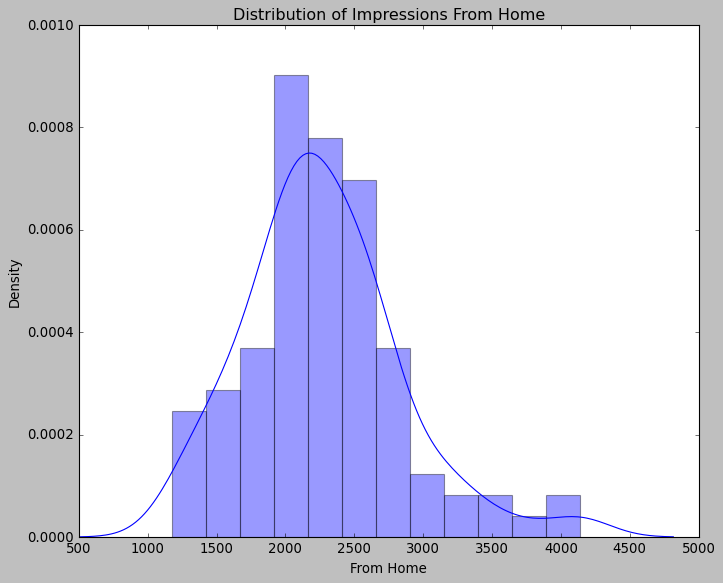

In [198]:
# styling/sizing
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Home")
# Home impressions distribution plot
sns.distplot(df['From Home'])
plt.show()

In [199]:
# Obervation: 
# most of the posts published to the 'Home' page accumulate around 2k impressions

## Distribution of Impressions From Hashtags 

C:\Users\HafsaHassan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



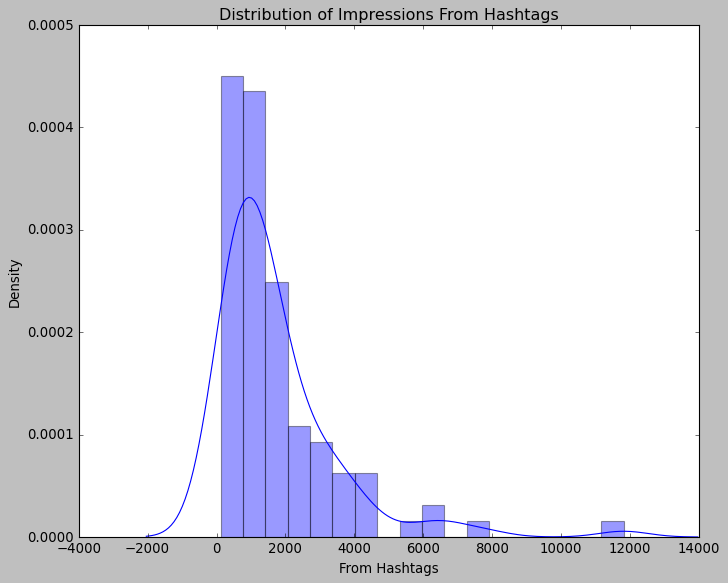

In [200]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions From Hashtags')
sns.distplot(df['From Hashtags'])
plt.show()

#### Interpretation: Although the proportions of users being reached through hashtags make up a smaller slice of overall impressions..
#### Hashtags allow us to reach users interested in the kind of content being tagged

## Distribution of Impressions From Explore Page

C:\Users\HafsaHassan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



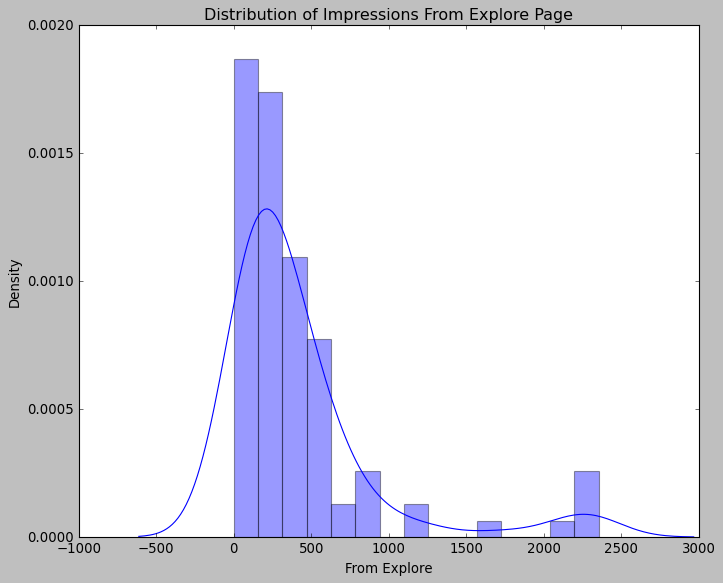

In [201]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions From Explore Page')
sns.distplot(df['From Explore'])
plt.show()

#### 'Explore' is IG's recommendation system - displaying content to users based on their interests
#### Interpretation: A relatively small number of impressions are coming from the explore page, compared to hastags/home page - posts not being pushed by the algorithm 

# Visual Analysis 

In [245]:
home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

labels = ['Home', 'Hashtags', 'Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, title='IG Impressions by Source', hole=0.5)

fig.show()

# Hover over slices to see individual values!

## Interpretation 
- can see most of our impressions (almost 50%) come from the home page
- hashtags make up the 2nd largest proportion 
- social media marketing would likely benefit from creating a strategy to tap into the "Explore" page views

## Content theme visualisation - What were the most common themes/topics posted?

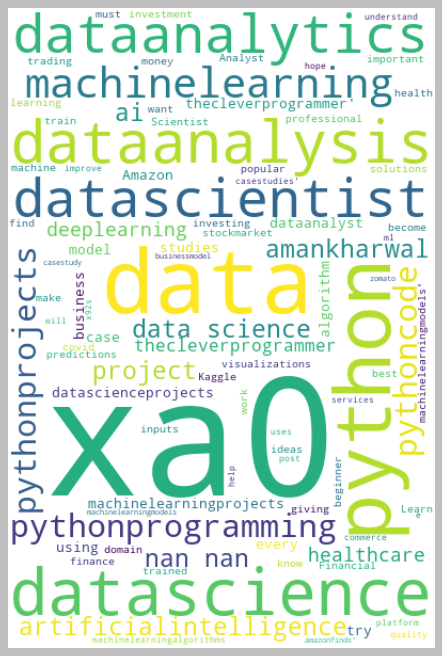

In [203]:
text = df.values
# excluding words from our wordcloud using the built-in stopwords module from WordCloud
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords, background_color="white", height = 600, width = 400).generate(str(text))
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtags worldcloud 

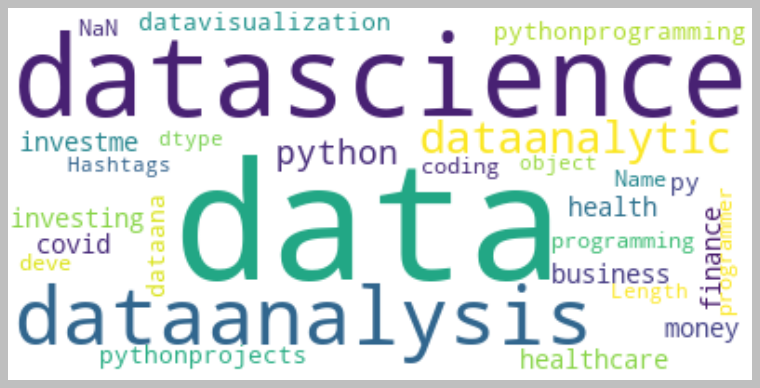

In [204]:
text = df.Hashtags
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analysing relationships - linear regression
- likes vs impressions - are the likes count correlating with the impressions?
- 

In [211]:
# Likes vs impressions. Scatter plots best for visualising relationships
figure = px.scatter(data_frame=df, x='Impressions', y='Likes', size='Likes', trendline='ols', title='Relationship Between Likes and Impressions')
figure.show()


## Interpretation:
- Clear linear relationship! posts with more exposure/impressions recieve more likes

## Comments and Impressions Relationship

In [215]:
figure = px.scatter(data_frame = df, x='Impressions', y='Comments', size='Comments', trendline='ols', title='Relationship Between Comments and Total Impressions')
figure.show()

## Interpretation
- Vague linear relationship. Number of comments/user engagement not as strongly correlated with popularity of content. Posts with fewer impressions tend to receive the most comments

## Number of Saves per Post and Impressions Relationship

In [217]:
figure = px.scatter(data_frame=df, x='Impressions', y='Saves', size='Saves', trendline='ols', title='Relationship Between Post Saves and Total Impressions')
figure.show()

- Linear relationship - posts that are saved more often do tend to have a higher imprssion/reach count


In [219]:
# Viewing correlations between all of the different dimensions against impressions
correlation = df.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


In [220]:
# Likes, hashtags, follows and profile visits have the highest correlation with impressions/reach


## Analyzing Conversion Rate
- Conversion rate = how many profile visits translate into new followers
- Formula: (Follows/Profile Visits) * 100


In [222]:
conversion_rate = (df['Follows'].sum() / df['Profile Visits'].sum()) * 100
print(conversion_rate)
# 31% of people who visit our profile will follow

31.17770767613039


## Visualising: Relationship between total profile visits and number of followers gained

In [224]:
figure = px.scatter(data_frame=df, x='Profile Visits', y='Follows', size='Follows', trendline='ols', title='Relationship Between Total Profile Visits and Followers Gained')
figure.show()

In [225]:
# Analysis: Linear relationship - Greater profile traffic indicates likelihood of more followers coming in

## Instagram Reach Prediction Model - Linear Regression 
- Predicting the reach of an Instagram Post - based on the factors we've determined correlate strongly (or weakly) with a post's popularity - likes, comments, number of profile visits etc

In [229]:
# Splitting the data into train/test 
X = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [230]:
# Training ML model with the split data
# Using the Passive Aggressive Regression algorithm - an online ML algorithm that learns incrementally, as new data arrives 
# PAR useful for problems where there is a continuous stream of incoming data, like IG

model = PassiveAggressiveRegressor()
model.fit(Xtrain, y_train)
model.score(Xtest, y_test)

0.9056010571844062

In [243]:
 # Features we want to use in prediction: Likes, saves, comments, shares, profile viists, follows
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
# Based on these features, predicting the reach (impressions) of an IG post
model.predict(features)

array([9182.53113473])